In [1]:
# Run this cell locally to set up Spark. On AWS EMR the "spark" context is provided already
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = """\
    --conf spark.driver.bindAddress=localhost \
    --conf spark.driver.host=localhost \
    --packages "org.apache.hadoop:hadoop-aws:2.7.3" pyspark-shell"""
os.environ['SPARK_MASTER_HOST'] = 'localhost'
os.environ['AWS_ACCESS_KEY_ID'] = "foo"
os.environ['AWS_SECRET_ACCESS_KEY'] = "bar"
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SQLContext
conf = SparkConf()\
    .setMaster("local[12]")\
    .setAppName("fire-occurrence-classifer")\
    .set("spark.executor.memory", "14G") \
    .set("spark.driver.memory", "14G") \
    .set("spark.sql.parquet.compression.codec", "snappy")
sc = SparkContext(conf=conf)
spark = SQLContext(sc)

In [2]:
from pyspark.ml.feature import PCAModel
loadedModel = PCAModel.load("s3a://dse-cohort5-group5/wildfire_capstone/pcamodel.sparkobject")
loadedModel.explainedVariance

DenseVector([0.3134, 0.2013, 0.0769, 0.0522, 0.03, 0.024, 0.0235, 0.0217, 0.0207, 0.0158, 0.0124, 0.0111, 0.0097, 0.0084, 0.0081, 0.0077, 0.0069, 0.0067, 0.0062, 0.0052, 0.005, 0.005, 0.0042, 0.0041, 0.0037, 0.0034, 0.0033, 0.0031, 0.0029, 0.0026, 0.0026, 0.0025, 0.0023, 0.0023, 0.0021, 0.0021, 0.002, 0.0019, 0.0018, 0.0018, 0.0017, 0.0017, 0.0017, 0.0016, 0.0016, 0.0015, 0.0014, 0.0014, 0.0014, 0.0013, 0.0013, 0.0013, 0.0012, 0.0012, 0.0012, 0.0011, 0.0011, 0.0011, 0.0011, 0.001, 0.001, 0.001, 0.0009, 0.0009, 0.0009, 0.0009, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.00

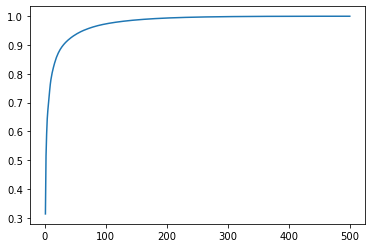

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
cumulativeExplainedVariance = np.cumsum(loadedModel.explainedVariance)
N = len(loadedModel.explainedVariance)
plt.plot(range(1, N+1), cumulativeExplainedVariance);

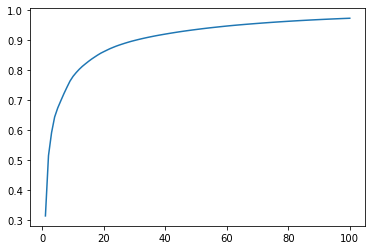

In [8]:
plt.plot(range(1, 100+1), cumulativeExplainedVariance[:100]);

In [3]:
pcs = loadedModel.pc.toArray().T
print(pcs.shape)
pcs

(500, 574)


array([[-1.11875594e-02, -4.31411891e-02, -7.18649812e-04, ...,
         2.92144249e-02,  4.53628132e-02,  5.05964114e-02],
       [-1.45061479e-02,  3.24549849e-02,  7.25521766e-02, ...,
        -5.44090357e-02, -4.87123983e-02, -4.55540049e-02],
       [-3.54294007e-03, -5.05336746e-03,  1.77898122e-02, ...,
         5.43364033e-02,  3.08362689e-02,  4.80074683e-03],
       ...,
       [-2.71162432e-06, -3.32174490e-05,  2.30538281e-04, ...,
         7.43684843e-04, -3.08499072e-04, -1.18277117e-03],
       [-2.08023276e-05, -4.90070506e-05,  4.72486842e-05, ...,
        -2.06516896e-03,  4.14312236e-04, -5.20486596e-04],
       [-2.25944478e-05,  1.84101884e-05,  2.71427607e-05, ...,
         2.24721663e-03,  4.02473579e-04, -1.68595090e-03]])

In [9]:
import numpy as np
counts = [list(enumerate(row)) for row in np.abs(pcs)]
counts[0]

[(0, 0.011187559445160478),
 (1, 0.04314118910010889),
 (2, 0.0007186498116362738),
 (3, 0.020475516820414996),
 (4, 0.001190854102494278),
 (5, 0.009070134740707215),
 (6, 0.05275116453319902),
 (7, 0.03546586023354617),
 (8, 0.05064099823489076),
 (9, 0.05540506957370692),
 (10, 0.07007701594998433),
 (11, 0.06627748144638336),
 (12, 0.04615309967683802),
 (13, 0.05863763793413876),
 (14, 0.0034108299081715976),
 (15, 0.04236931986866062),
 (16, 0.009445683822999543),
 (17, 0.028206311365523137),
 (18, 0.004201840610324315),
 (19, 0.0036499000317465175),
 (20, 0.053120573381695256),
 (21, 0.032214181770776514),
 (22, 0.04525073588335936),
 (23, 0.056955376461966016),
 (24, 0.06927314223873778),
 (25, 0.0670058423337999),
 (26, 0.04868358088237212),
 (27, 0.06067082353535946),
 (28, 0.000398125186446101),
 (29, 0.03983005705846709),
 (30, 0.011612190957114327),
 (31, 0.032089558011522114),
 (32, 0.007529039034516955),
 (33, 0.001391519785855748),
 (34, 0.05225592845280017),
 (35, 0.02

In [10]:
counts = [sorted(vec, key=lambda x: -x[1])[:20] for vec in counts]
counts[0]

[(389, 0.07052886912413693),
 (277, 0.0704995672943345),
 (375, 0.07042192077549311),
 (263, 0.0703879816066634),
 (136, 0.0702352640142202),
 (403, 0.0701693762401226),
 (291, 0.07014939760091975),
 (10, 0.07007701594998433),
 (248, 0.07006162503852359),
 (150, 0.0700126804298341),
 (360, 0.06995479794744057),
 (262, 0.06969329662140526),
 (164, 0.06960694867174194),
 (361, 0.0694444326439333),
 (249, 0.06941950681841762),
 (374, 0.06941710649961233),
 (24, 0.06927314223873778),
 (276, 0.06920978286557848),
 (178, 0.06898513292200673),
 (293, 0.06897334753190434)]

In [15]:
from collections import Counter
counter = Counter([idx for vec in counts for (idx, val) in vec])
most_important_components = list(sorted(counter.items(), key=lambda x: -x[1]))
most_important_components[:10]

[(110, 35),
 (465, 34),
 (102, 33),
 (200, 33),
 (33, 33),
 (100, 33),
 (63, 32),
 (225, 32),
 (550, 32),
 (124, 32)]

In [16]:
cols = ['fire_occurrences.`precipitation_amount_mm`', 
'fire_occurrences.`relative_humidity_%`', 
'fire_occurrences.`specific_humidity_kg/kg`', 
'fire_occurrences.`surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'fire_occurrences.`wind_from_direction_Degrees_Clockwise_from_north`', 
'fire_occurrences.`wind_speed_m/s`', 
'fire_occurrences.`max_air_temperature_K`', 
'fire_occurrences.`min_air_temperature_K`', 
'fire_occurrences.`burning_index_g_Unitless`', 
'fire_occurrences.`dead_fuel_moisture_100hr_Percent`', 
'fire_occurrences.`dead_fuel_moisture_1000hr_Percent`', 
'fire_occurrences.`energy_release_component-g_Unitless`', 
'fire_occurrences.`potential_evapotranspiration_mm`', 
'fire_occurrences.`mean_vapor_pressure_deficit_kPa`', 
'min.`7d_min_precipitation_amount_mm`', 
'min.`7d_min_relative_humidity_%`', 
'min.`7d_min_specific_humidity_kg/kg`', 
'min.`7d_min_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'min.`7d_min_wind_from_direction_Degrees_Clockwise_from_north`', 
'min.`7d_min_wind_speed_m/s`', 
'min.`7d_min_max_air_temperature_K`', 
'min.`7d_min_min_air_temperature_K`', 
'min.`7d_min_burning_index_g_Unitless`', 
'min.`7d_min_dead_fuel_moisture_100hr_Percent`', 
'min.`7d_min_dead_fuel_moisture_1000hr_Percent`', 
'min.`7d_min_energy_release_component-g_Unitless`', 
'min.`7d_min_potential_evapotranspiration_mm`', 
'min.`7d_min_mean_vapor_pressure_deficit_kPa`', 
'min.`14d_min_precipitation_amount_mm`', 
'min.`14d_min_relative_humidity_%`', 
'min.`14d_min_specific_humidity_kg/kg`', 
'min.`14d_min_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'min.`14d_min_wind_from_direction_Degrees_Clockwise_from_north`', 
'min.`14d_min_wind_speed_m/s`', 
'min.`14d_min_max_air_temperature_K`', 
'min.`14d_min_min_air_temperature_K`', 
'min.`14d_min_burning_index_g_Unitless`', 
'min.`14d_min_dead_fuel_moisture_100hr_Percent`', 
'min.`14d_min_dead_fuel_moisture_1000hr_Percent`', 
'min.`14d_min_energy_release_component-g_Unitless`', 
'min.`14d_min_potential_evapotranspiration_mm`', 
'min.`14d_min_mean_vapor_pressure_deficit_kPa`', 
'min.`21d_min_precipitation_amount_mm`', 
'min.`21d_min_relative_humidity_%`', 
'min.`21d_min_specific_humidity_kg/kg`', 
'min.`21d_min_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'min.`21d_min_wind_from_direction_Degrees_Clockwise_from_north`', 
'min.`21d_min_wind_speed_m/s`', 
'min.`21d_min_max_air_temperature_K`', 
'min.`21d_min_min_air_temperature_K`', 
'min.`21d_min_burning_index_g_Unitless`', 
'min.`21d_min_dead_fuel_moisture_100hr_Percent`', 
'min.`21d_min_dead_fuel_moisture_1000hr_Percent`', 
'min.`21d_min_energy_release_component-g_Unitless`', 
'min.`21d_min_potential_evapotranspiration_mm`', 
'min.`21d_min_mean_vapor_pressure_deficit_kPa`', 
'min.`30d_min_precipitation_amount_mm`', 
'min.`30d_min_relative_humidity_%`', 
'min.`30d_min_specific_humidity_kg/kg`', 
'min.`30d_min_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'min.`30d_min_wind_from_direction_Degrees_Clockwise_from_north`', 
'min.`30d_min_wind_speed_m/s`', 
'min.`30d_min_max_air_temperature_K`', 
'min.`30d_min_min_air_temperature_K`', 
'min.`30d_min_burning_index_g_Unitless`', 
'min.`30d_min_dead_fuel_moisture_100hr_Percent`', 
'min.`30d_min_dead_fuel_moisture_1000hr_Percent`', 
'min.`30d_min_energy_release_component-g_Unitless`', 
'min.`30d_min_potential_evapotranspiration_mm`', 
'min.`30d_min_mean_vapor_pressure_deficit_kPa`', 
'min.`60d_min_precipitation_amount_mm`', 
'min.`60d_min_relative_humidity_%`', 
'min.`60d_min_specific_humidity_kg/kg`', 
'min.`60d_min_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'min.`60d_min_wind_from_direction_Degrees_Clockwise_from_north`', 
'min.`60d_min_wind_speed_m/s`', 
'min.`60d_min_max_air_temperature_K`', 
'min.`60d_min_min_air_temperature_K`', 
'min.`60d_min_burning_index_g_Unitless`', 
'min.`60d_min_dead_fuel_moisture_100hr_Percent`', 
'min.`60d_min_dead_fuel_moisture_1000hr_Percent`', 
'min.`60d_min_energy_release_component-g_Unitless`', 
'min.`60d_min_potential_evapotranspiration_mm`', 
'min.`60d_min_mean_vapor_pressure_deficit_kPa`', 
'min.`90d_min_precipitation_amount_mm`', 
'min.`90d_min_relative_humidity_%`', 
'min.`90d_min_specific_humidity_kg/kg`', 
'min.`90d_min_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'min.`90d_min_wind_from_direction_Degrees_Clockwise_from_north`', 
'min.`90d_min_wind_speed_m/s`', 
'min.`90d_min_max_air_temperature_K`', 
'min.`90d_min_min_air_temperature_K`', 
'min.`90d_min_burning_index_g_Unitless`', 
'min.`90d_min_dead_fuel_moisture_100hr_Percent`', 
'min.`90d_min_dead_fuel_moisture_1000hr_Percent`', 
'min.`90d_min_energy_release_component-g_Unitless`', 
'min.`90d_min_potential_evapotranspiration_mm`', 
'min.`90d_min_mean_vapor_pressure_deficit_kPa`', 
'min.`180d_min_precipitation_amount_mm`', 
'min.`180d_min_relative_humidity_%`', 
'min.`180d_min_specific_humidity_kg/kg`', 
'min.`180d_min_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'min.`180d_min_wind_from_direction_Degrees_Clockwise_from_north`', 
'min.`180d_min_wind_speed_m/s`', 
'min.`180d_min_max_air_temperature_K`', 
'min.`180d_min_min_air_temperature_K`', 
'min.`180d_min_burning_index_g_Unitless`', 
'min.`180d_min_dead_fuel_moisture_100hr_Percent`', 
'min.`180d_min_dead_fuel_moisture_1000hr_Percent`', 
'min.`180d_min_energy_release_component-g_Unitless`', 
'min.`180d_min_potential_evapotranspiration_mm`', 
'min.`180d_min_mean_vapor_pressure_deficit_kPa`', 
'min.`365d_min_precipitation_amount_mm`', 
'min.`365d_min_relative_humidity_%`', 
'min.`365d_min_specific_humidity_kg/kg`', 
'min.`365d_min_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'min.`365d_min_wind_from_direction_Degrees_Clockwise_from_north`', 
'min.`365d_min_wind_speed_m/s`', 
'min.`365d_min_max_air_temperature_K`', 
'min.`365d_min_min_air_temperature_K`', 
'min.`365d_min_burning_index_g_Unitless`', 
'min.`365d_min_dead_fuel_moisture_100hr_Percent`', 
'min.`365d_min_dead_fuel_moisture_1000hr_Percent`', 
'min.`365d_min_energy_release_component-g_Unitless`', 
'min.`365d_min_potential_evapotranspiration_mm`', 
'min.`365d_min_mean_vapor_pressure_deficit_kPa`', 
'max.`7d_max_precipitation_amount_mm`', 
'max.`7d_max_relative_humidity_%`', 
'max.`7d_max_specific_humidity_kg/kg`', 
'max.`7d_max_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'max.`7d_max_wind_from_direction_Degrees_Clockwise_from_north`', 
'max.`7d_max_wind_speed_m/s`', 
'max.`7d_max_max_air_temperature_K`', 
'max.`7d_max_min_air_temperature_K`', 
'max.`7d_max_burning_index_g_Unitless`', 
'max.`7d_max_dead_fuel_moisture_100hr_Percent`', 
'max.`7d_max_dead_fuel_moisture_1000hr_Percent`', 
'max.`7d_max_energy_release_component-g_Unitless`', 
'max.`7d_max_potential_evapotranspiration_mm`', 
'max.`7d_max_mean_vapor_pressure_deficit_kPa`', 
'max.`14d_max_precipitation_amount_mm`', 
'max.`14d_max_relative_humidity_%`', 
'max.`14d_max_specific_humidity_kg/kg`', 
'max.`14d_max_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'max.`14d_max_wind_from_direction_Degrees_Clockwise_from_north`', 
'max.`14d_max_wind_speed_m/s`', 
'max.`14d_max_max_air_temperature_K`', 
'max.`14d_max_min_air_temperature_K`', 
'max.`14d_max_burning_index_g_Unitless`', 
'max.`14d_max_dead_fuel_moisture_100hr_Percent`', 
'max.`14d_max_dead_fuel_moisture_1000hr_Percent`', 
'max.`14d_max_energy_release_component-g_Unitless`', 
'max.`14d_max_potential_evapotranspiration_mm`', 
'max.`14d_max_mean_vapor_pressure_deficit_kPa`', 
'max.`21d_max_precipitation_amount_mm`', 
'max.`21d_max_relative_humidity_%`', 
'max.`21d_max_specific_humidity_kg/kg`', 
'max.`21d_max_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'max.`21d_max_wind_from_direction_Degrees_Clockwise_from_north`', 
'max.`21d_max_wind_speed_m/s`', 
'max.`21d_max_max_air_temperature_K`', 
'max.`21d_max_min_air_temperature_K`', 
'max.`21d_max_burning_index_g_Unitless`', 
'max.`21d_max_dead_fuel_moisture_100hr_Percent`', 
'max.`21d_max_dead_fuel_moisture_1000hr_Percent`', 
'max.`21d_max_energy_release_component-g_Unitless`', 
'max.`21d_max_potential_evapotranspiration_mm`', 
'max.`21d_max_mean_vapor_pressure_deficit_kPa`', 
'max.`30d_max_precipitation_amount_mm`', 
'max.`30d_max_relative_humidity_%`', 
'max.`30d_max_specific_humidity_kg/kg`', 
'max.`30d_max_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'max.`30d_max_wind_from_direction_Degrees_Clockwise_from_north`', 
'max.`30d_max_wind_speed_m/s`', 
'max.`30d_max_max_air_temperature_K`', 
'max.`30d_max_min_air_temperature_K`', 
'max.`30d_max_burning_index_g_Unitless`', 
'max.`30d_max_dead_fuel_moisture_100hr_Percent`', 
'max.`30d_max_dead_fuel_moisture_1000hr_Percent`', 
'max.`30d_max_energy_release_component-g_Unitless`', 
'max.`30d_max_potential_evapotranspiration_mm`', 
'max.`30d_max_mean_vapor_pressure_deficit_kPa`', 
'max.`60d_max_precipitation_amount_mm`', 
'max.`60d_max_relative_humidity_%`', 
'max.`60d_max_specific_humidity_kg/kg`', 
'max.`60d_max_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'max.`60d_max_wind_from_direction_Degrees_Clockwise_from_north`', 
'max.`60d_max_wind_speed_m/s`', 
'max.`60d_max_max_air_temperature_K`', 
'max.`60d_max_min_air_temperature_K`', 
'max.`60d_max_burning_index_g_Unitless`', 
'max.`60d_max_dead_fuel_moisture_100hr_Percent`', 
'max.`60d_max_dead_fuel_moisture_1000hr_Percent`', 
'max.`60d_max_energy_release_component-g_Unitless`', 
'max.`60d_max_potential_evapotranspiration_mm`', 
'max.`60d_max_mean_vapor_pressure_deficit_kPa`', 
'max.`90d_max_precipitation_amount_mm`', 
'max.`90d_max_relative_humidity_%`', 
'max.`90d_max_specific_humidity_kg/kg`', 
'max.`90d_max_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'max.`90d_max_wind_from_direction_Degrees_Clockwise_from_north`', 
'max.`90d_max_wind_speed_m/s`', 
'max.`90d_max_max_air_temperature_K`', 
'max.`90d_max_min_air_temperature_K`', 
'max.`90d_max_burning_index_g_Unitless`', 
'max.`90d_max_dead_fuel_moisture_100hr_Percent`', 
'max.`90d_max_dead_fuel_moisture_1000hr_Percent`', 
'max.`90d_max_energy_release_component-g_Unitless`', 
'max.`90d_max_potential_evapotranspiration_mm`', 
'max.`90d_max_mean_vapor_pressure_deficit_kPa`', 
'max.`180d_max_precipitation_amount_mm`', 
'max.`180d_max_relative_humidity_%`', 
'max.`180d_max_specific_humidity_kg/kg`', 
'max.`180d_max_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'max.`180d_max_wind_from_direction_Degrees_Clockwise_from_north`', 
'max.`180d_max_wind_speed_m/s`', 
'max.`180d_max_max_air_temperature_K`', 
'max.`180d_max_min_air_temperature_K`', 
'max.`180d_max_burning_index_g_Unitless`', 
'max.`180d_max_dead_fuel_moisture_100hr_Percent`', 
'max.`180d_max_dead_fuel_moisture_1000hr_Percent`', 
'max.`180d_max_energy_release_component-g_Unitless`', 
'max.`180d_max_potential_evapotranspiration_mm`', 
'max.`180d_max_mean_vapor_pressure_deficit_kPa`', 
'max.`365d_max_precipitation_amount_mm`', 
'max.`365d_max_relative_humidity_%`', 
'max.`365d_max_specific_humidity_kg/kg`', 
'max.`365d_max_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'max.`365d_max_wind_from_direction_Degrees_Clockwise_from_north`', 
'max.`365d_max_wind_speed_m/s`', 
'max.`365d_max_max_air_temperature_K`', 
'max.`365d_max_min_air_temperature_K`', 
'max.`365d_max_burning_index_g_Unitless`', 
'max.`365d_max_dead_fuel_moisture_100hr_Percent`', 
'max.`365d_max_dead_fuel_moisture_1000hr_Percent`', 
'max.`365d_max_energy_release_component-g_Unitless`', 
'max.`365d_max_potential_evapotranspiration_mm`', 
'max.`365d_max_mean_vapor_pressure_deficit_kPa`', 
'mean.`7d_mean_precipitation_amount_mm`', 
'mean.`7d_mean_relative_humidity_%`', 
'mean.`7d_mean_specific_humidity_kg/kg`', 
'mean.`7d_mean_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'mean.`7d_mean_wind_from_direction_Degrees_Clockwise_from_north`', 
'mean.`7d_mean_wind_speed_m/s`', 
'mean.`7d_mean_max_air_temperature_K`', 
'mean.`7d_mean_min_air_temperature_K`', 
'mean.`7d_mean_burning_index_g_Unitless`', 
'mean.`7d_mean_dead_fuel_moisture_100hr_Percent`', 
'mean.`7d_mean_dead_fuel_moisture_1000hr_Percent`', 
'mean.`7d_mean_energy_release_component-g_Unitless`', 
'mean.`7d_mean_potential_evapotranspiration_mm`', 
'mean.`7d_mean_mean_vapor_pressure_deficit_kPa`', 
'mean.`14d_mean_precipitation_amount_mm`', 
'mean.`14d_mean_relative_humidity_%`', 
'mean.`14d_mean_specific_humidity_kg/kg`', 
'mean.`14d_mean_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'mean.`14d_mean_wind_from_direction_Degrees_Clockwise_from_north`', 
'mean.`14d_mean_wind_speed_m/s`', 
'mean.`14d_mean_max_air_temperature_K`', 
'mean.`14d_mean_min_air_temperature_K`', 
'mean.`14d_mean_burning_index_g_Unitless`', 
'mean.`14d_mean_dead_fuel_moisture_100hr_Percent`', 
'mean.`14d_mean_dead_fuel_moisture_1000hr_Percent`', 
'mean.`14d_mean_energy_release_component-g_Unitless`', 
'mean.`14d_mean_potential_evapotranspiration_mm`', 
'mean.`14d_mean_mean_vapor_pressure_deficit_kPa`', 
'mean.`21d_mean_precipitation_amount_mm`', 
'mean.`21d_mean_relative_humidity_%`', 
'mean.`21d_mean_specific_humidity_kg/kg`', 
'mean.`21d_mean_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'mean.`21d_mean_wind_from_direction_Degrees_Clockwise_from_north`', 
'mean.`21d_mean_wind_speed_m/s`', 
'mean.`21d_mean_max_air_temperature_K`', 
'mean.`21d_mean_min_air_temperature_K`', 
'mean.`21d_mean_burning_index_g_Unitless`', 
'mean.`21d_mean_dead_fuel_moisture_100hr_Percent`', 
'mean.`21d_mean_dead_fuel_moisture_1000hr_Percent`', 
'mean.`21d_mean_energy_release_component-g_Unitless`', 
'mean.`21d_mean_potential_evapotranspiration_mm`', 
'mean.`21d_mean_mean_vapor_pressure_deficit_kPa`', 
'mean.`30d_mean_precipitation_amount_mm`', 
'mean.`30d_mean_relative_humidity_%`', 
'mean.`30d_mean_specific_humidity_kg/kg`', 
'mean.`30d_mean_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'mean.`30d_mean_wind_from_direction_Degrees_Clockwise_from_north`', 
'mean.`30d_mean_wind_speed_m/s`', 
'mean.`30d_mean_max_air_temperature_K`', 
'mean.`30d_mean_min_air_temperature_K`', 
'mean.`30d_mean_burning_index_g_Unitless`', 
'mean.`30d_mean_dead_fuel_moisture_100hr_Percent`', 
'mean.`30d_mean_dead_fuel_moisture_1000hr_Percent`', 
'mean.`30d_mean_energy_release_component-g_Unitless`', 
'mean.`30d_mean_potential_evapotranspiration_mm`', 
'mean.`30d_mean_mean_vapor_pressure_deficit_kPa`', 
'mean.`60d_mean_precipitation_amount_mm`', 
'mean.`60d_mean_relative_humidity_%`', 
'mean.`60d_mean_specific_humidity_kg/kg`', 
'mean.`60d_mean_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'mean.`60d_mean_wind_from_direction_Degrees_Clockwise_from_north`', 
'mean.`60d_mean_wind_speed_m/s`', 
'mean.`60d_mean_max_air_temperature_K`', 
'mean.`60d_mean_min_air_temperature_K`', 
'mean.`60d_mean_burning_index_g_Unitless`', 
'mean.`60d_mean_dead_fuel_moisture_100hr_Percent`', 
'mean.`60d_mean_dead_fuel_moisture_1000hr_Percent`', 
'mean.`60d_mean_energy_release_component-g_Unitless`', 
'mean.`60d_mean_potential_evapotranspiration_mm`', 
'mean.`60d_mean_mean_vapor_pressure_deficit_kPa`', 
'mean.`90d_mean_precipitation_amount_mm`', 
'mean.`90d_mean_relative_humidity_%`', 
'mean.`90d_mean_specific_humidity_kg/kg`', 
'mean.`90d_mean_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'mean.`90d_mean_wind_from_direction_Degrees_Clockwise_from_north`', 
'mean.`90d_mean_wind_speed_m/s`', 
'mean.`90d_mean_max_air_temperature_K`', 
'mean.`90d_mean_min_air_temperature_K`', 
'mean.`90d_mean_burning_index_g_Unitless`', 
'mean.`90d_mean_dead_fuel_moisture_100hr_Percent`', 
'mean.`90d_mean_dead_fuel_moisture_1000hr_Percent`', 
'mean.`90d_mean_energy_release_component-g_Unitless`', 
'mean.`90d_mean_potential_evapotranspiration_mm`', 
'mean.`90d_mean_mean_vapor_pressure_deficit_kPa`', 
'mean.`180d_mean_precipitation_amount_mm`', 
'mean.`180d_mean_relative_humidity_%`', 
'mean.`180d_mean_specific_humidity_kg/kg`', 
'mean.`180d_mean_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'mean.`180d_mean_wind_from_direction_Degrees_Clockwise_from_north`', 
'mean.`180d_mean_wind_speed_m/s`', 
'mean.`180d_mean_max_air_temperature_K`', 
'mean.`180d_mean_min_air_temperature_K`', 
'mean.`180d_mean_burning_index_g_Unitless`', 
'mean.`180d_mean_dead_fuel_moisture_100hr_Percent`', 
'mean.`180d_mean_dead_fuel_moisture_1000hr_Percent`', 
'mean.`180d_mean_energy_release_component-g_Unitless`', 
'mean.`180d_mean_potential_evapotranspiration_mm`', 
'mean.`180d_mean_mean_vapor_pressure_deficit_kPa`', 
'mean.`365d_mean_precipitation_amount_mm`', 
'mean.`365d_mean_relative_humidity_%`', 
'mean.`365d_mean_specific_humidity_kg/kg`', 
'mean.`365d_mean_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'mean.`365d_mean_wind_from_direction_Degrees_Clockwise_from_north`', 
'mean.`365d_mean_wind_speed_m/s`', 
'mean.`365d_mean_max_air_temperature_K`', 
'mean.`365d_mean_min_air_temperature_K`', 
'mean.`365d_mean_burning_index_g_Unitless`', 
'mean.`365d_mean_dead_fuel_moisture_100hr_Percent`', 
'mean.`365d_mean_dead_fuel_moisture_1000hr_Percent`', 
'mean.`365d_mean_energy_release_component-g_Unitless`', 
'mean.`365d_mean_potential_evapotranspiration_mm`', 
'mean.`365d_mean_mean_vapor_pressure_deficit_kPa`', 
'cumulative.`7d_cumulative_precipitation_amount_mm`', 
'cumulative.`7d_cumulative_relative_humidity_%`', 
'cumulative.`7d_cumulative_specific_humidity_kg/kg`', 
'cumulative.`7d_cumulative_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'cumulative.`7d_cumulative_wind_from_direction_Degrees_Clockwise_from_north`', 
'cumulative.`7d_cumulative_wind_speed_m/s`', 
'cumulative.`7d_cumulative_max_air_temperature_K`', 
'cumulative.`7d_cumulative_min_air_temperature_K`', 
'cumulative.`7d_cumulative_burning_index_g_Unitless`', 
'cumulative.`7d_cumulative_dead_fuel_moisture_100hr_Percent`', 
'cumulative.`7d_cumulative_dead_fuel_moisture_1000hr_Percent`', 
'cumulative.`7d_cumulative_energy_release_component-g_Unitless`', 
'cumulative.`7d_cumulative_potential_evapotranspiration_mm`', 
'cumulative.`7d_cumulative_mean_vapor_pressure_deficit_kPa`', 
'cumulative.`14d_cumulative_precipitation_amount_mm`', 
'cumulative.`14d_cumulative_relative_humidity_%`', 
'cumulative.`14d_cumulative_specific_humidity_kg/kg`', 
'cumulative.`14d_cumulative_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'cumulative.`14d_cumulative_wind_from_direction_Degrees_Clockwise_from_north`', 
'cumulative.`14d_cumulative_wind_speed_m/s`', 
'cumulative.`14d_cumulative_max_air_temperature_K`', 
'cumulative.`14d_cumulative_min_air_temperature_K`', 
'cumulative.`14d_cumulative_burning_index_g_Unitless`', 
'cumulative.`14d_cumulative_dead_fuel_moisture_100hr_Percent`', 
'cumulative.`14d_cumulative_dead_fuel_moisture_1000hr_Percent`', 
'cumulative.`14d_cumulative_energy_release_component-g_Unitless`', 
'cumulative.`14d_cumulative_potential_evapotranspiration_mm`', 
'cumulative.`14d_cumulative_mean_vapor_pressure_deficit_kPa`', 
'cumulative.`21d_cumulative_precipitation_amount_mm`', 
'cumulative.`21d_cumulative_relative_humidity_%`', 
'cumulative.`21d_cumulative_specific_humidity_kg/kg`', 
'cumulative.`21d_cumulative_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'cumulative.`21d_cumulative_wind_from_direction_Degrees_Clockwise_from_north`', 
'cumulative.`21d_cumulative_wind_speed_m/s`', 
'cumulative.`21d_cumulative_max_air_temperature_K`', 
'cumulative.`21d_cumulative_min_air_temperature_K`', 
'cumulative.`21d_cumulative_burning_index_g_Unitless`', 
'cumulative.`21d_cumulative_dead_fuel_moisture_100hr_Percent`', 
'cumulative.`21d_cumulative_dead_fuel_moisture_1000hr_Percent`', 
'cumulative.`21d_cumulative_energy_release_component-g_Unitless`', 
'cumulative.`21d_cumulative_potential_evapotranspiration_mm`', 
'cumulative.`21d_cumulative_mean_vapor_pressure_deficit_kPa`', 
'cumulative.`30d_cumulative_precipitation_amount_mm`', 
'cumulative.`30d_cumulative_relative_humidity_%`', 
'cumulative.`30d_cumulative_specific_humidity_kg/kg`', 
'cumulative.`30d_cumulative_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'cumulative.`30d_cumulative_wind_from_direction_Degrees_Clockwise_from_north`', 
'cumulative.`30d_cumulative_wind_speed_m/s`', 
'cumulative.`30d_cumulative_max_air_temperature_K`', 
'cumulative.`30d_cumulative_min_air_temperature_K`', 
'cumulative.`30d_cumulative_burning_index_g_Unitless`', 
'cumulative.`30d_cumulative_dead_fuel_moisture_100hr_Percent`', 
'cumulative.`30d_cumulative_dead_fuel_moisture_1000hr_Percent`', 
'cumulative.`30d_cumulative_energy_release_component-g_Unitless`', 
'cumulative.`30d_cumulative_potential_evapotranspiration_mm`', 
'cumulative.`30d_cumulative_mean_vapor_pressure_deficit_kPa`', 
'cumulative.`60d_cumulative_precipitation_amount_mm`', 
'cumulative.`60d_cumulative_relative_humidity_%`', 
'cumulative.`60d_cumulative_specific_humidity_kg/kg`', 
'cumulative.`60d_cumulative_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'cumulative.`60d_cumulative_wind_from_direction_Degrees_Clockwise_from_north`', 
'cumulative.`60d_cumulative_wind_speed_m/s`', 
'cumulative.`60d_cumulative_max_air_temperature_K`', 
'cumulative.`60d_cumulative_min_air_temperature_K`', 
'cumulative.`60d_cumulative_burning_index_g_Unitless`', 
'cumulative.`60d_cumulative_dead_fuel_moisture_100hr_Percent`', 
'cumulative.`60d_cumulative_dead_fuel_moisture_1000hr_Percent`', 
'cumulative.`60d_cumulative_energy_release_component-g_Unitless`', 
'cumulative.`60d_cumulative_potential_evapotranspiration_mm`', 
'cumulative.`60d_cumulative_mean_vapor_pressure_deficit_kPa`', 
'cumulative.`90d_cumulative_precipitation_amount_mm`', 
'cumulative.`90d_cumulative_relative_humidity_%`', 
'cumulative.`90d_cumulative_specific_humidity_kg/kg`', 
'cumulative.`90d_cumulative_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'cumulative.`90d_cumulative_wind_from_direction_Degrees_Clockwise_from_north`', 
'cumulative.`90d_cumulative_wind_speed_m/s`', 
'cumulative.`90d_cumulative_max_air_temperature_K`', 
'cumulative.`90d_cumulative_min_air_temperature_K`', 
'cumulative.`90d_cumulative_burning_index_g_Unitless`', 
'cumulative.`90d_cumulative_dead_fuel_moisture_100hr_Percent`', 
'cumulative.`90d_cumulative_dead_fuel_moisture_1000hr_Percent`', 
'cumulative.`90d_cumulative_energy_release_component-g_Unitless`', 
'cumulative.`90d_cumulative_potential_evapotranspiration_mm`', 
'cumulative.`90d_cumulative_mean_vapor_pressure_deficit_kPa`', 
'cumulative.`180d_cumulative_precipitation_amount_mm`', 
'cumulative.`180d_cumulative_relative_humidity_%`', 
'cumulative.`180d_cumulative_specific_humidity_kg/kg`', 
'cumulative.`180d_cumulative_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'cumulative.`180d_cumulative_wind_from_direction_Degrees_Clockwise_from_north`', 
'cumulative.`180d_cumulative_wind_speed_m/s`', 
'cumulative.`180d_cumulative_max_air_temperature_K`', 
'cumulative.`180d_cumulative_min_air_temperature_K`', 
'cumulative.`180d_cumulative_burning_index_g_Unitless`', 
'cumulative.`180d_cumulative_dead_fuel_moisture_100hr_Percent`', 
'cumulative.`180d_cumulative_dead_fuel_moisture_1000hr_Percent`', 
'cumulative.`180d_cumulative_energy_release_component-g_Unitless`', 
'cumulative.`180d_cumulative_potential_evapotranspiration_mm`', 
'cumulative.`180d_cumulative_mean_vapor_pressure_deficit_kPa`', 
'cumulative.`365d_cumulative_precipitation_amount_mm`', 
'cumulative.`365d_cumulative_relative_humidity_%`', 
'cumulative.`365d_cumulative_specific_humidity_kg/kg`', 
'cumulative.`365d_cumulative_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'cumulative.`365d_cumulative_wind_from_direction_Degrees_Clockwise_from_north`', 
'cumulative.`365d_cumulative_wind_speed_m/s`', 
'cumulative.`365d_cumulative_max_air_temperature_K`', 
'cumulative.`365d_cumulative_min_air_temperature_K`', 
'cumulative.`365d_cumulative_burning_index_g_Unitless`', 
'cumulative.`365d_cumulative_dead_fuel_moisture_100hr_Percent`', 
'cumulative.`365d_cumulative_dead_fuel_moisture_1000hr_Percent`', 
'cumulative.`365d_cumulative_energy_release_component-g_Unitless`', 
'cumulative.`365d_cumulative_potential_evapotranspiration_mm`', 
'cumulative.`365d_cumulative_mean_vapor_pressure_deficit_kPa`', 
'std.`7d_std_precipitation_amount_mm`', 
'std.`7d_std_relative_humidity_%`', 
'std.`7d_std_specific_humidity_kg/kg`', 
'std.`7d_std_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'std.`7d_std_wind_from_direction_Degrees_Clockwise_from_north`', 
'std.`7d_std_wind_speed_m/s`', 
'std.`7d_std_max_air_temperature_K`', 
'std.`7d_std_min_air_temperature_K`', 
'std.`7d_std_burning_index_g_Unitless`', 
'std.`7d_std_dead_fuel_moisture_100hr_Percent`', 
'std.`7d_std_dead_fuel_moisture_1000hr_Percent`', 
'std.`7d_std_energy_release_component-g_Unitless`', 
'std.`7d_std_potential_evapotranspiration_mm`', 
'std.`7d_std_mean_vapor_pressure_deficit_kPa`', 
'std.`14d_std_precipitation_amount_mm`', 
'std.`14d_std_relative_humidity_%`', 
'std.`14d_std_specific_humidity_kg/kg`', 
'std.`14d_std_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'std.`14d_std_wind_from_direction_Degrees_Clockwise_from_north`', 
'std.`14d_std_wind_speed_m/s`', 
'std.`14d_std_max_air_temperature_K`', 
'std.`14d_std_min_air_temperature_K`', 
'std.`14d_std_burning_index_g_Unitless`', 
'std.`14d_std_dead_fuel_moisture_100hr_Percent`', 
'std.`14d_std_dead_fuel_moisture_1000hr_Percent`', 
'std.`14d_std_energy_release_component-g_Unitless`', 
'std.`14d_std_potential_evapotranspiration_mm`', 
'std.`14d_std_mean_vapor_pressure_deficit_kPa`', 
'std.`21d_std_precipitation_amount_mm`', 
'std.`21d_std_relative_humidity_%`', 
'std.`21d_std_specific_humidity_kg/kg`', 
'std.`21d_std_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'std.`21d_std_wind_from_direction_Degrees_Clockwise_from_north`', 
'std.`21d_std_wind_speed_m/s`', 
'std.`21d_std_max_air_temperature_K`', 
'std.`21d_std_min_air_temperature_K`', 
'std.`21d_std_burning_index_g_Unitless`', 
'std.`21d_std_dead_fuel_moisture_100hr_Percent`', 
'std.`21d_std_dead_fuel_moisture_1000hr_Percent`', 
'std.`21d_std_energy_release_component-g_Unitless`', 
'std.`21d_std_potential_evapotranspiration_mm`', 
'std.`21d_std_mean_vapor_pressure_deficit_kPa`', 
'std.`30d_std_precipitation_amount_mm`', 
'std.`30d_std_relative_humidity_%`', 
'std.`30d_std_specific_humidity_kg/kg`', 
'std.`30d_std_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'std.`30d_std_wind_from_direction_Degrees_Clockwise_from_north`', 
'std.`30d_std_wind_speed_m/s`', 
'std.`30d_std_max_air_temperature_K`', 
'std.`30d_std_min_air_temperature_K`', 
'std.`30d_std_burning_index_g_Unitless`', 
'std.`30d_std_dead_fuel_moisture_100hr_Percent`', 
'std.`30d_std_dead_fuel_moisture_1000hr_Percent`', 
'std.`30d_std_energy_release_component-g_Unitless`', 
'std.`30d_std_potential_evapotranspiration_mm`', 
'std.`30d_std_mean_vapor_pressure_deficit_kPa`', 
'std.`60d_std_precipitation_amount_mm`', 
'std.`60d_std_relative_humidity_%`', 
'std.`60d_std_specific_humidity_kg/kg`', 
'std.`60d_std_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'std.`60d_std_wind_from_direction_Degrees_Clockwise_from_north`', 
'std.`60d_std_wind_speed_m/s`', 
'std.`60d_std_max_air_temperature_K`', 
'std.`60d_std_min_air_temperature_K`', 
'std.`60d_std_burning_index_g_Unitless`', 
'std.`60d_std_dead_fuel_moisture_100hr_Percent`', 
'std.`60d_std_dead_fuel_moisture_1000hr_Percent`', 
'std.`60d_std_energy_release_component-g_Unitless`', 
'std.`60d_std_potential_evapotranspiration_mm`', 
'std.`60d_std_mean_vapor_pressure_deficit_kPa`', 
'std.`90d_std_precipitation_amount_mm`', 
'std.`90d_std_relative_humidity_%`', 
'std.`90d_std_specific_humidity_kg/kg`', 
'std.`90d_std_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'std.`90d_std_wind_from_direction_Degrees_Clockwise_from_north`', 
'std.`90d_std_wind_speed_m/s`', 
'std.`90d_std_max_air_temperature_K`', 
'std.`90d_std_min_air_temperature_K`', 
'std.`90d_std_burning_index_g_Unitless`', 
'std.`90d_std_dead_fuel_moisture_100hr_Percent`', 
'std.`90d_std_dead_fuel_moisture_1000hr_Percent`', 
'std.`90d_std_energy_release_component-g_Unitless`', 
'std.`90d_std_potential_evapotranspiration_mm`', 
'std.`90d_std_mean_vapor_pressure_deficit_kPa`', 
'std.`180d_std_precipitation_amount_mm`', 
'std.`180d_std_relative_humidity_%`', 
'std.`180d_std_specific_humidity_kg/kg`', 
'std.`180d_std_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'std.`180d_std_wind_from_direction_Degrees_Clockwise_from_north`', 
'std.`180d_std_wind_speed_m/s`', 
'std.`180d_std_max_air_temperature_K`', 
'std.`180d_std_min_air_temperature_K`', 
'std.`180d_std_burning_index_g_Unitless`', 
'std.`180d_std_dead_fuel_moisture_100hr_Percent`', 
'std.`180d_std_dead_fuel_moisture_1000hr_Percent`', 
'std.`180d_std_energy_release_component-g_Unitless`', 
'std.`180d_std_potential_evapotranspiration_mm`', 
'std.`180d_std_mean_vapor_pressure_deficit_kPa`', 
'std.`365d_std_precipitation_amount_mm`', 
'std.`365d_std_relative_humidity_%`', 
'std.`365d_std_specific_humidity_kg/kg`', 
'std.`365d_std_surface_downwelling_shortwave_flux_in_air_W_m-2`', 
'std.`365d_std_wind_from_direction_Degrees_Clockwise_from_north`', 
'std.`365d_std_wind_speed_m/s`', 
'std.`365d_std_max_air_temperature_K`', 
'std.`365d_std_min_air_temperature_K`', 
'std.`365d_std_burning_index_g_Unitless`', 
'std.`365d_std_dead_fuel_moisture_100hr_Percent`', 
'std.`365d_std_dead_fuel_moisture_1000hr_Percent`', 
'std.`365d_std_energy_release_component-g_Unitless`', 
'std.`365d_std_potential_evapotranspiration_mm`', 
'std.`365d_std_mean_vapor_pressure_deficit_kPa`']

In [19]:
for idx, count in most_important_components:
    print("Column {} was a top feature {} times".format(cols[idx], count))

Column min.`180d_min_potential_evapotranspiration_mm` was a top feature 35 times
Column std.`7d_std_surface_downwelling_shortwave_flux_in_air_W_m-2` was a top feature 34 times
Column min.`180d_min_wind_from_direction_Degrees_Clockwise_from_north` was a top feature 33 times
Column max.`90d_max_wind_from_direction_Degrees_Clockwise_from_north` was a top feature 33 times
Column min.`14d_min_wind_speed_m/s` was a top feature 33 times
Column min.`180d_min_specific_humidity_kg/kg` was a top feature 33 times
Column min.`30d_min_min_air_temperature_K` was a top feature 32 times
Column max.`365d_max_relative_humidity_%` was a top feature 32 times
Column std.`180d_std_wind_from_direction_Degrees_Clockwise_from_north` was a top feature 32 times
Column min.`365d_min_potential_evapotranspiration_mm` was a top feature 32 times
Column std.`7d_std_potential_evapotranspiration_mm` was a top feature 32 times
Column std.`365d_std_wind_from_direction_Degrees_Clockwise_from_north` was a top feature 32 time